# Artificle Neural Network

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

Single layer neural network'e ML, Multi layer neural network Deep Learning'dir. 

Bir sonraki layer'ın bir önceki layer'ın 2/3'ü kadar node'a sahip olması önerilir. Örn: 15:9:6:4:1

Model kurmadan önce X değerleri arasında non-linear bir ilişki varsa transformation işlemi yapılır.

Tamamı numeric verilerden oluşan verilerde daha iyi sonuçlar verir.

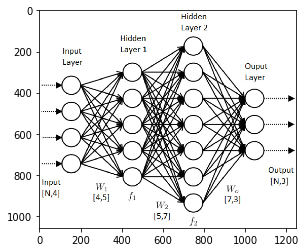

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Resources/ann.png')
imgplot = plt.imshow(img)

In [6]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# Transformation of the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [27]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=200).fit(X_train_scaled, y_train)
mlpc

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.7402597402597403

In [12]:
?mlpc

In [34]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (100,100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [35]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 507 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1155 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.5min finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [36]:
print('En iyi parametreler: '+str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [48]:
mlpc = MLPClassifier(activation='logistic',alpha=0.1, hidden_layer_sizes= (100,100,100), solver = 'adam' )
mlpc_tuned = mlpc.fit(X_train_scaled, y_train)

In [49]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Support Vector Machines

SVM maximum margin ile verileri bölmeye çalışan bir hyperplane kurmaya çalışır. BU hyperplane'in verilere olan uzaklıkları maximize edilmeye çalışılır.   

SVM classification için kullanılır.     
SVR (sv regression) regression için kullanılır.

In [53]:
svm_model = SVC(kernel = 'linear').fit(X_train,y_train)
svm_model
# default kernel 'rbf'tir. Circle fit etmeye çalışır. Biz kernel'ı linear yaparak bie line fit edeceğiz.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7445887445887446

In [58]:
svc_params = {'C':np.arange(1,10)}
svc = SVC(kernel='linear')
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs= -1, verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.3min finished


KeyboardInterrupt: 

In [59]:
print('En iyi parametreler: '+str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}
